<h1 style="color:blue;">Exoplanet Exploration - ML challenge</h1>

<h3 style="color:green;">Data loading and variable exploration</h3>

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("data/cumulative.csv")

In [4]:
dataset

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [5]:
dataset.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

* __rowid(DELETE):__ original id table
* __kepid(DELETE):__ Target identification number, as listed in the Kepler Input Catalog (KIC).
* __kepoi_name(DELETE):__ A number used to identify and track a Kepler Object of Interest (KOI). A KOI is a target identified by the Kepler Project
* __koi_disposition (y):__ The category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.
* __koi_pdisposition(???):__ The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE.
* __koi_score:__ A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.
* __koi_fpflag_nt:__ A KOI whose light curve is not consistent with that of a transiting planet.
* __koi_fpflag_ss:__ A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary.
* __koi_fpflag_co:__ The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit
* __koi_fpflag_ec:__ The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.

...


* __koi_period:__ koi_period_err1 and koi_period_err2
* __koi_impact:__ koi_impact_err1 and koi_impact_err2
* __koi_duration:__ koi_duration_err1 and koi_duration_err2
* __koi_depth:__ koi_depth_err1 and koi_depth_err2
* __koi_prad:__ koi_prad_err1 and koi_prad_err2
* __koi_teq:__ koi_teq_err1 and koi_teq_err2
* __koi_insol:__ koi_insol_err1 and koi_insol_err2
* __koi_model_snr:__ 
* __koi_tce_plnt_num:__ 
* __koi_tce_delivname (DUMMIE???):__ 
* __koi_steff:__ koi_steff_err1 and koi_steff_err2
* __koi_slogg:__ koi_slogg_err1 and koi_slogg_err2
* __koi_srad:__ koi_srad_err1 and koi_srad_err2
* __ra:__ KIC Right Ascension
* __dec:__ KIC Declination
* __koi_kepmag:__ Kepler-band (mag)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
rowid                9564 non-null int64
kepid                9564 non-null int64
kepoi_name           9564 non-null object
kepler_name          2294 non-null object
koi_disposition      9564 non-null object
koi_pdisposition     9564 non-null object
koi_score            8054 non-null float64
koi_fpflag_nt        9564 non-null int64
koi_fpflag_ss        9564 non-null int64
koi_fpflag_co        9564 non-null int64
koi_fpflag_ec        9564 non-null int64
koi_period           9564 non-null float64
koi_period_err1      9110 non-null float64
koi_period_err2      9110 non-null float64
koi_time0bk          9564 non-null float64
koi_time0bk_err1     9110 non-null float64
koi_time0bk_err2     9110 non-null float64
koi_impact           9201 non-null float64
koi_impact_err1      9110 non-null float64
koi_impact_err2      9110 non-null float64
koi_duration         9564 non-null float64
koi_du

<h3 style="color:green;">Data cleaning</h3>

In [7]:
#remove koi_teq_err1 and koi_teq_err2; plus index and name columns

dataset = dataset.drop(columns = ["rowid", "kepid", "kepoi_name", "kepler_name",
                                  "koi_pdisposition", "koi_score", "koi_tce_delivname", "koi_teq_err1", "koi_teq_err2"], axis=1)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 41 columns):
koi_disposition      9564 non-null object
koi_fpflag_nt        9564 non-null int64
koi_fpflag_ss        9564 non-null int64
koi_fpflag_co        9564 non-null int64
koi_fpflag_ec        9564 non-null int64
koi_period           9564 non-null float64
koi_period_err1      9110 non-null float64
koi_period_err2      9110 non-null float64
koi_time0bk          9564 non-null float64
koi_time0bk_err1     9110 non-null float64
koi_time0bk_err2     9110 non-null float64
koi_impact           9201 non-null float64
koi_impact_err1      9110 non-null float64
koi_impact_err2      9110 non-null float64
koi_duration         9564 non-null float64
koi_duration_err1    9110 non-null float64
koi_duration_err2    9110 non-null float64
koi_depth            9201 non-null float64
koi_depth_err1       9110 non-null float64
koi_depth_err2       9110 non-null float64
koi_prad             9201 non-null float64

In [9]:
#drop all "err" columns
more_cols = []

for column in dataset.columns:
    if "err" in column:
        more_cols.append(column)

In [10]:
dataset = dataset.drop(columns = more_cols, axis=1)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 21 columns):
koi_disposition     9564 non-null object
koi_fpflag_nt       9564 non-null int64
koi_fpflag_ss       9564 non-null int64
koi_fpflag_co       9564 non-null int64
koi_fpflag_ec       9564 non-null int64
koi_period          9564 non-null float64
koi_time0bk         9564 non-null float64
koi_impact          9201 non-null float64
koi_duration        9564 non-null float64
koi_depth           9201 non-null float64
koi_prad            9201 non-null float64
koi_teq             9201 non-null float64
koi_insol           9243 non-null float64
koi_model_snr       9201 non-null float64
koi_tce_plnt_num    9218 non-null float64
koi_steff           9201 non-null float64
koi_slogg           9201 non-null float64
koi_srad            9201 non-null float64
ra                  9564 non-null float64
dec                 9564 non-null float64
koi_kepmag          9563 non-null float64
dtypes: float64(16),

<h3 style="color:green;">Data transformation</h3>

In [12]:
#get all columns with numerical data
num_col = []
for col in dataset.columns:
    if col != "koi_disposition":
        num_col.append(col)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [14]:
# deal with nan values through SimpleImputer
ct_num = ColumnTransformer([
    ("medianImputer", SimpleImputer(strategy="median"), num_col)
])

In [15]:
ct_num.fit_transform(dataset).shape

(9564, 20)

In [16]:
#separate data into X and y
y = dataset["koi_disposition"]#.values.reshape(-1, 1)
X = dataset.drop("koi_disposition", axis=1)
print(X.shape, y.shape)

(9564, 20) (9564,)


In [17]:
#split data into train data and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [18]:
X_trainn = ct_num.fit_transform(X_train)

<h3 style="color:green;">Models evaluation</h3>

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_trainn, y_train, cv=10)

In [21]:
print(forest_scores, ">>>", forest_scores.mean())

[0.87465181 0.8913649  0.90111421 0.90529248 0.89693593 0.89972145
 0.89400279 0.91759777 0.89106145 0.8924581 ] >>> 0.8964200887780324


In [22]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(multi_class="auto", solver="liblinear", max_iter=300)
logistic_scores = cross_val_score(logistic_clf, X_trainn, y_train, cv=10)

In [23]:
print(logistic_scores, ">>>", logistic_scores.mean())

[0.6086351  0.61142061 0.62534819 0.60584958 0.64763231 0.61142061
 0.64295676 0.61312849 0.63826816 0.62290503] >>> 0.6227564846958568


In [24]:
#SUPPORT VECTOR CLASSIFIER
from sklearn.svm import SVC

svm_clf = SVC(gamma = "auto")
svm_scores = cross_val_score(svm_clf, X_trainn, y_train, cv = 10)

In [25]:
print(svm_scores, ">>>", svm_scores.mean())

[0.52506964 0.52506964 0.52506964 0.52506964 0.52367688 0.52506964
 0.52580195 0.52513966 0.52513966 0.52513966] >>> 0.5250246016631486


In [26]:
#K NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_scores = cross_val_score(knn_clf, X_trainn, y_train, cv = 10)

In [27]:
print(knn_scores, ">>>", knn_scores.mean())

[0.56545961 0.60584958 0.6086351  0.57799443 0.61420613 0.58774373
 0.57182706 0.59497207 0.60195531 0.59078212] >>> 0.5919425133776597


<h3 style="color:green;">Results comparison</h3>

Text(0, 0.5, 'Accuracy')

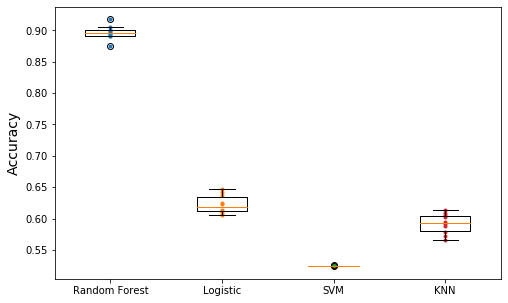

In [28]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (8, 5))
plt.plot([1] * 10, forest_scores, ".")
plt.plot([2] * 10, logistic_scores, ".")
plt.plot([3] * 10, svm_scores, ".")
plt.plot([4] * 10, knn_scores, ".")

plt.boxplot([forest_scores, logistic_scores, svm_scores, knn_scores], labels = ("Random Forest", "Logistic", "SVM", "KNN"))
plt.ylabel("Accuracy", fontsize = 14)
#plt.show()

<h3 style="color:green;">Model tuning (grid search)</h3>

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    #{"n_estimators": [10,100,300], "max_features": [2,3,4]}
    {"n_estimators": [100,300,500], "max_features": [4,5,6]}
]

forest_clf = RandomForestClassifier(random_state=42)

gridSearch = GridSearchCV(
    forest_clf,
    param_grid,
    cv=10,
    return_train_score=True
    
)

gridSearch.fit(X_trainn, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[

In [33]:
gridSearch.best_params_

{'max_features': 4, 'n_estimators': 300}

In [34]:
gridSearch.best_score_

0.8987871183605186

<h3 style="color:green;">Best model optimized</h3>

In [29]:
X_testt = ct_num.fit_transform(X_test)

In [30]:
optimal_rf_clf = RandomForestClassifier(max_features=4, n_estimators=300)
optimal_rf_clf.fit(X_trainn, y_train)
y_predict = optimal_rf_clf.predict(X_testt)

In [31]:
exoplanets_predictions = X_test.copy()

In [32]:
exoplanets_predictions["Prediction"] = y_predict

<h3 style="color:green;">Predictions</h3>

In [33]:
exoplanets_predictions

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag,Prediction
1872,0,0,0,0,28.505722,132.920750,0.695,6.32400,755.8,2.55,...,22.43,20.8,1.0,5712.0,4.534,0.870,292.23242,38.892220,15.778,CONFIRMED
5042,0,1,0,0,17.907665,139.743761,2.790,5.58652,265410.0,282.86,...,73.31,1731.4,1.0,6173.0,4.447,1.041,296.11542,51.007111,16.107,FALSE POSITIVE
2487,0,0,0,0,0.698461,131.851380,0.459,0.78870,134.4,14.81,...,168689.02,16.1,1.0,4676.0,2.577,12.558,295.34222,48.856152,13.586,CANDIDATE
3787,1,0,0,1,0.866346,131.628600,0.409,2.01100,116.4,1.24,...,5186.18,13.9,1.0,6241.0,4.366,1.131,296.11276,39.611599,13.789,FALSE POSITIVE
7860,0,1,0,0,14.797219,144.695961,0.157,7.61037,252700.0,47.71,...,90.80,7795.3,1.0,6343.0,4.495,0.931,292.02866,42.669552,14.185,FALSE POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,0,0,0,0,12.671437,137.507070,0.047,2.49800,215.8,0.76,...,6.31,13.7,3.0,3705.0,4.721,0.529,297.42920,40.561909,13.693,CONFIRMED
1891,0,0,0,0,14.833409,135.442130,0.399,3.92700,783.0,2.54,...,54.74,19.1,1.0,5570.0,4.471,0.904,293.98358,39.572880,15.707,CONFIRMED
6857,1,0,0,0,545.456240,131.698410,NaN,5.91000,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,289.40317,51.736649,12.104,FALSE POSITIVE
7108,0,1,0,0,4.390514,132.550761,0.879,2.94720,46829.0,41.83,...,910.71,290.7,1.0,6081.0,4.133,1.454,283.26172,41.084480,13.209,FALSE POSITIVE
